##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

07/28/2021  11:41 AM    <DIR>          .
07/28/2021  11:41 AM    <DIR>          ..
07/28/2021  11:39 AM    <DIR>          .ipynb_checkpoints
07/28/2021  11:37 AM             6,163 C' v. Z for 1nm thick sample 06-28-2021.png
07/28/2021  11:37 AM             6,179 C' v. Z for varying sample thickness, 06-28-2021.png
07/28/2021  11:37 AM             5,715 Cz v. Z for varying sample thickness, 06-28-2021.png
07/28/2021  11:42 AM    <DIR>          FortranOutputTest
07/28/2021  11:28 AM    <DIR>          PythonOutputTest
07/28/2021  11:41 AM            91,187 Tirmzi_istep4-Copy2.ipynb
               4 File(s)        109,244 bytes
               5 Dir(s)  142,724,673,536 bytes free


In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("FortranOutputTest/*/")
folders


['FortranOutputTest\\Test_1\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'Z-U.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'FortranOutputTest\\Test_1\\': {'z': array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19., 20.]),
  'c': array([6.30397348e-15, 6.30349950e-15, 6.30305612e-15, 6.30263444e-15,
         6.30223000e-15, 6.30183835e-15, 6.30145672e-15, 6.30108455e-15,
         6.30071905e-15, 6.30035967e-15, 6.30000586e-15, 6.29965649e-15,
         6.29931102e-15, 6.29897000e-15, 6.29863176e-15, 6.29829631e-15,
         6.29796419e-15, 6.29763374e-15, 6.29730607e-15]),
  'cz': array([-4.73978869e-10, -4.58680256e-10, -4.32533534e-10, -4.13062571e-10,
         -3.98042114e-10, -3.86637693e-10, -3.76902211e-10, -3.68835670e-10,
         -3.62438067e-10, -3.56596779e-10, -3.51589960e-10, -3.47417610e-10,
         -3.43245261e-10, -3.39629225e-10, -3.36847659e-10, -3.33787936e-10,
         -3.31284527e-10, -3.29059274e-10, -3.27668491e-10]),
  'czz': array([0.01529861, 0.02072267, 0.02280884, 0.01724571, 0.01321244,
         0.01056995, 0.00890101, 0.007232

In [9]:
all_data.keys()

dict_keys(['FortranOutputTest\\Test_1\\'])

No handles with labels found to put in legend.


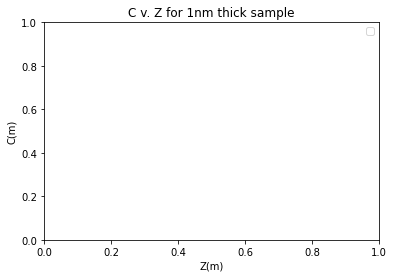

In [10]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

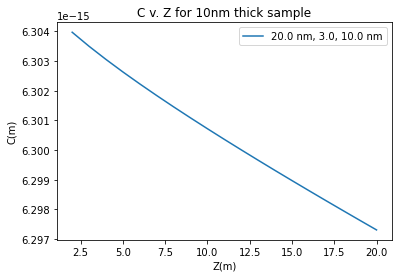

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 10nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for varying sample thickness, 06-28-2021.png")

No handles with labels found to put in legend.


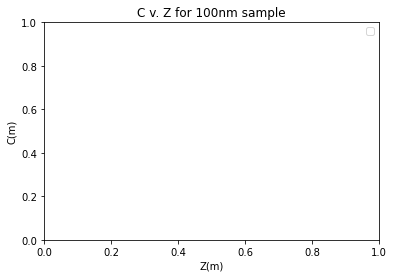

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 100.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 100nm sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for varying sample thickness, 06-28-2021.png")

No handles with labels found to put in legend.


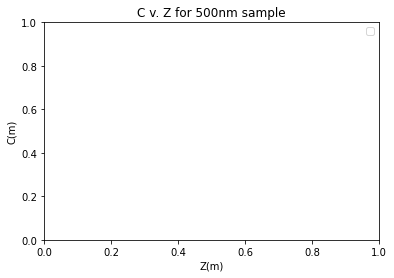

In [13]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 500.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 500nm sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for varying sample thickness, 06-28-2021.png")

cut off last experiment because capacitance was off the scale

In [14]:
for params in all_params.values():
    print(params['Thickness_sample'])
    print(params['m-'])

10.0
20


In [15]:
all_params

{'FortranOutputTest\\Test_1\\': {'n': 500,
  'm+': 500,
  'm-': 20,
  'h0': 0.5,
  'rho_max': 1000000.0,
  'z_max': 1000000.0,
  'min': 2.0,
  'max': 20.0,
  'istep': 2.0,
  'Rtip': 20.0,
  'half-angle': 15.0,
  'HCone': 15000.0,
  'RCantilever': 40000.0,
  'thickness_Cantilever': 500.0,
  'eps_r': 3.0,
  'Thickness_sample': 10.0,
  'Solving Method': 'LAPACK',
  'Test': 0,
  'Verbosity': 0,
  'Nuni': 1,
  'Equally spaced': False}}

No handles with labels found to put in legend.


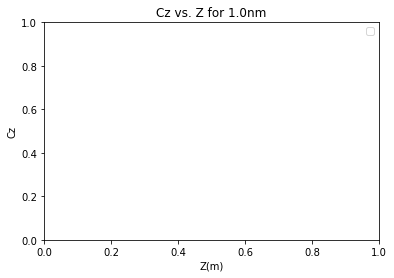

In [16]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

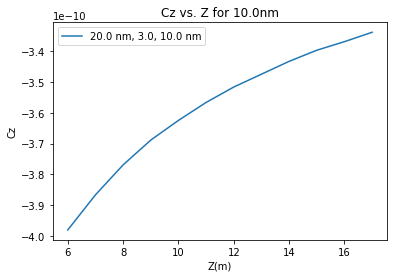

In [17]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 10.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

No handles with labels found to put in legend.


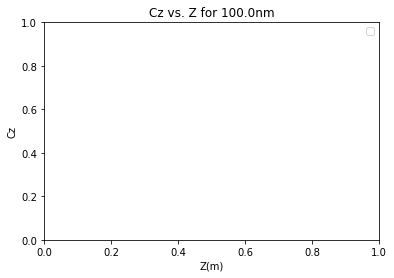

In [18]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 100.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 100.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

No handles with labels found to put in legend.


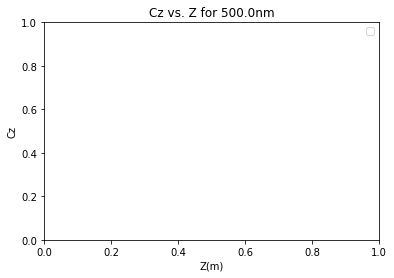

In [19]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 500.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 500.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

In [20]:
hoepker_data= np.loadtxt("Default Dataset (2).csv" , delimiter= ",")
hoepker_data

OSError: Default Dataset (2).csv not found.

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
params

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 10.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 100.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 100.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 500.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 500.0 nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 10.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Alpha vs. Z for 10.0 nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 100.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Alpha vs. Z for 100.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 500.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Alpha vs. Z for 500.0nm')
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [ ]:
data

In [ ]:
from scipy.optimize import curve_fit


In [ ]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [ ]:
all_data.keys()

In [ ]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)